In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xdweb/housing.csv


In [2]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn
print(sklearn.__version__)

1.4.2


In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

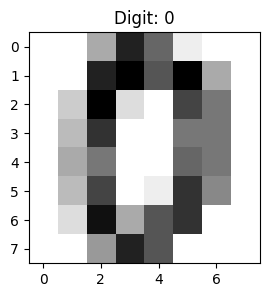

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Digit: {digits.target[0]}")  # Titre avec la valeur de la cible (label)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

In [7]:
print("Shape de X_train :", X_train.shape)
print("Shape de X_test :", X_test.shape)
print("Shape de y_train :", y_train.shape)
print("Shape de y_test :", y_test.shape)

Shape de X_train : (1257, 64)
Shape de X_test : (540, 64)
Shape de y_train : (1257,)
Shape de y_test : (540,)


In [8]:
import pandas as pd

# Spécifier les noms des colonnes
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Charger le fichier CSV en spécifiant le bon séparateur
housing_data = pd.read_csv("/kaggle/input/xdweb/housing.csv", names=column_names, sep='\s+')


# Afficher les premières lignes du DataFrame pour vérification
print(housing_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

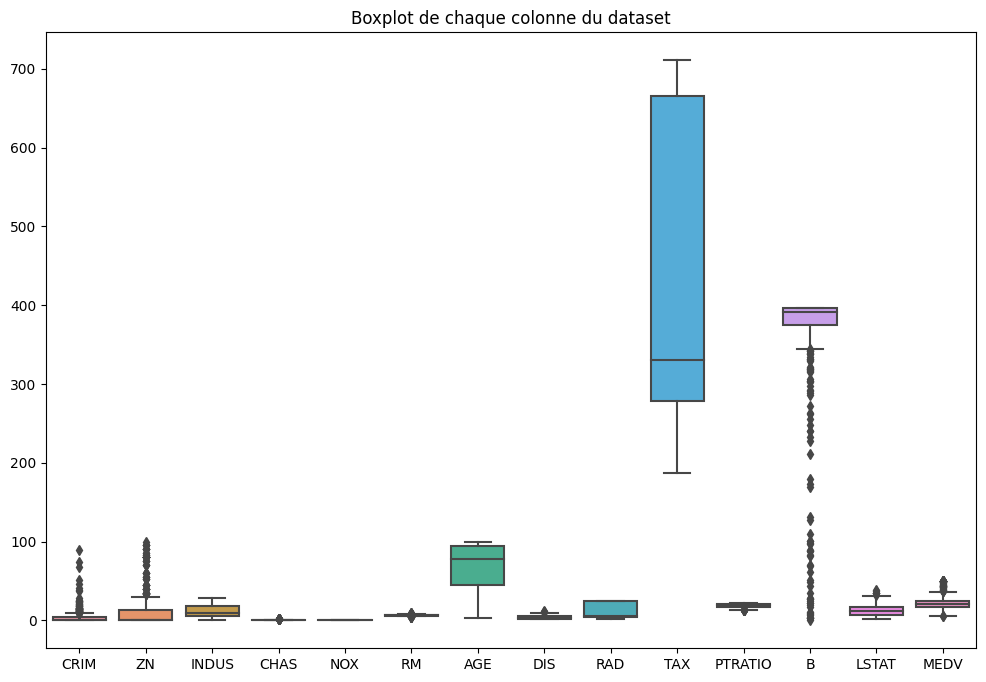

In [10]:
# Définir la taille de la figure
plt.figure(figsize=(12, 8))

# Tracer les boîtes à moustaches pour chaque colonne
sns.boxplot(data=housing_data, orient="v")  # orient="v" pour afficher les boîtes à la verticale

# Ajouter un titre à votre graphique
plt.title('Boxplot de chaque colonne du dataset')

# Afficher le graphique
plt.show()

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

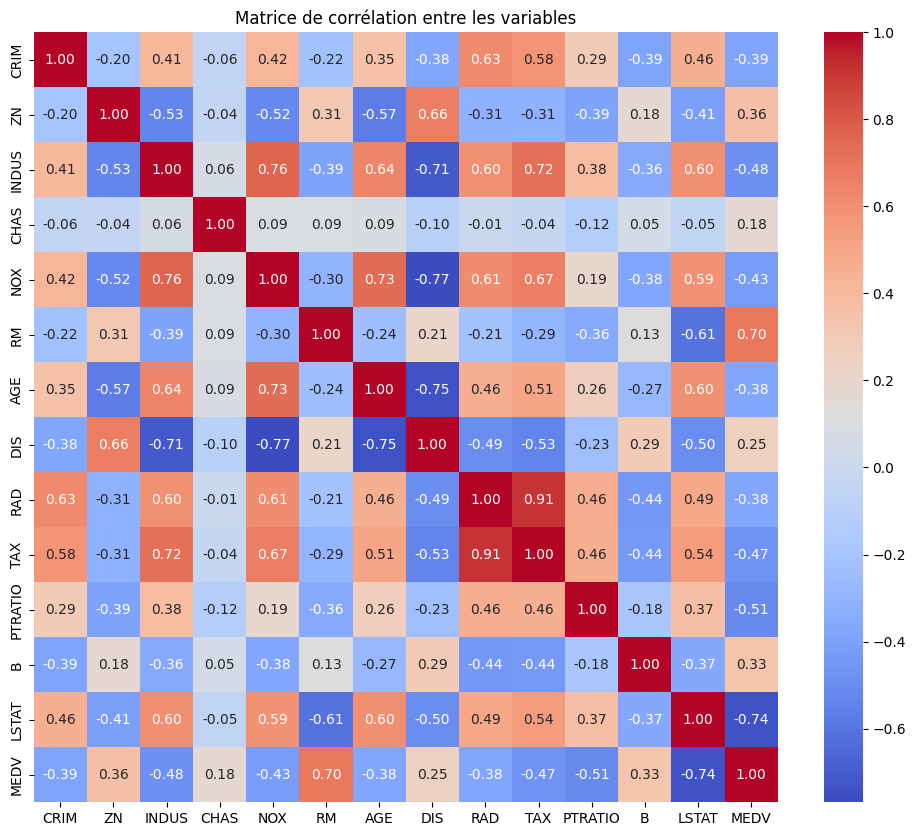

In [11]:
# Calculer la matrice de corrélation
correlation_matrix = housing_data.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

# Visualisation avec heatmap (optionnel mais recommandé pour une meilleure lisibilité)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation entre les variables')
plt.show()


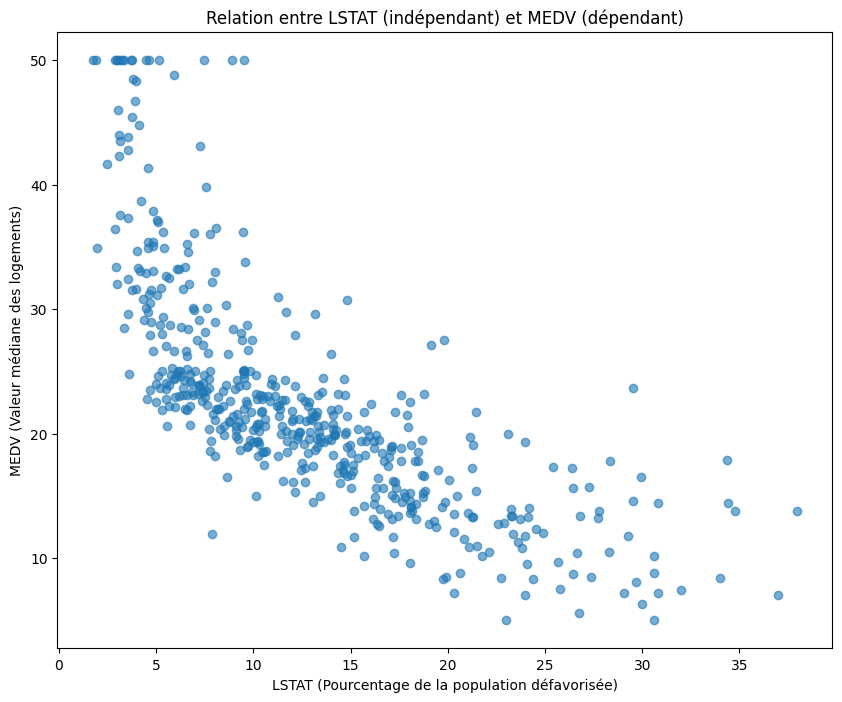

In [12]:
# Sélection des colonnes
X = housing_data[['LSTAT']]  # Variable indépendante
y = housing_data['MEDV']      # Variable dépendante

# Affichage de la figure
plt.figure(figsize=(10, 8))
plt.scatter(X, y, alpha=0.6)
plt.title('Relation entre LSTAT (indépendant) et MEDV (dépendant)')
plt.xlabel('LSTAT (Pourcentage de la population défavorisée)')
plt.ylabel('MEDV (Valeur médiane des logements)')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [14]:
print("Shape des données d'apprentissage X_train :", X_train.shape)
print("Shape des données de test X_test :", X_test.shape)
print("Shape des données d'apprentissage y_train :", y_train.shape)
print("Shape des données de test y_test :", y_test.shape)


Shape des données d'apprentissage X_train : (354, 1)
Shape des données de test X_test : (152, 1)
Shape des données d'apprentissage y_train : (354,)
Shape des données de test y_test : (152,)


In [15]:
from sklearn.linear_model import LinearRegression

# Création du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) sur les prédictions
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne (MSE) :", mse)

Erreur quadratique moyenne (MSE) : 38.0987021824347


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination (R-squared) :", r2)

Coefficient de détermination (R-squared) : 0.4886979007906852
